# 1. Data cleaning, preparation and exploration

## 1.1. Packages

In [255]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Avoid scientific notation in float values
pd.options.display.float_format = '{:.2f}'.format

# Ignore warnings
import warnings
warnings.simplefilter(action = "ignore")

# Show all rows and columns in the outputs
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Switch off the warning about setting with copy
pd.set_option('mode.chained_assignment', None)

# Increase width of column
pd.set_option('display.max_colwidth', None)

## 1.2. Import datasets

### a) Twitter variables and sentiment analysis

In [61]:
df_twitter = pd.read_csv("../data/df_monthly_ml.csv", parse_dates = [0])
df_twitter[['Date']] = df_twitter[['year_month']]
df_twitter = df_twitter.drop(['year_month'], axis = 1)
df_twitter.head()

,negative,neutral,positive,sentiment_month,BRG1665,BRG1666,BRG1667,BRG1668,BRG1669,BRG1670,BRG1671,BRG1672,BRG1673,BRG1674,BRG1675,BRG1676,BRG1677,BRG1678,BRG1679,BRG1680,BRG1681,BRG1682,BRG1683,BRG1685,BRG1686,BRG1687,BRG1688,BRG1689,BRG1690,BRG1691,in_reply_to_status_count,in_reply_to_user_count,in_quotation_user_count,in_quotation_status_count,in_retweet_user_count,in_retweet_status_count,entities_count,followers_mean,following_mean,user_statuses_mean,verified_users_count,retweets_count,quotes_count,replies_count,num_retweets_mean,num_quotes_mean,num_replies_mean,Date
0,878,6834,41,-0.107958,39,97,49,170,412,280,240,116,161,247,23,127,1981,34,427,256,215,8.0,29.0,583,9.0,22,158,2009,50,11,548,633,0,0,1356,1356,2869,3989.661808,1399.480459,22124.984522,22,1356,0,548,0.199665,0.000000,0.009932,2013-01-01 00:00:00+00:00
1,157,938,4,-0.139217,7,14,4,29,66,30,36,21,31,45,6,17,230,5,40,53,19,2.0,5.0,95,NaN,3,49,282,7,3,112,123,0,0,155,155,364,2193.081893,1487.720655,18782.346679,1,155,0,112,0.143767,0.007279,0.009099,2013-02-01 00:00:00+00:00
2,99,830,1,-0.105376,1,7,3,20,66,27,36,11,11,28,8,22,195,5,49,34,115,NaN,NaN,93,NaN,2,23,169,4,1,87,96,0,0,0,0,179,2936.934409,879.112903,25116.846237,3,0,0,87,0.003226,0.000000,0.013978,2013-03-01 00:00:00+00:00
3,2395,15427,76,-0.129568,81,326,116,407,1071,580,431,269,401,532,93,442,3851,74,937,890,535,35.0,92.0,2823,44.0,53,582,3066,145,22,1002,1368,0,0,0,0,2909,3671.593642,1031.220583,25916.370153,108,0,0,1002,0.001676,0.000112,0.011174,2013-04-01 00:00:00+00:00
4,2404,9826,48,-0.191888,66,91,79,162,505,374,215,214,315,420,74,330,2683,46,584,562,264,21.0,68.0,1661,23.0,46,378,2988,75,34,959,1201,0,0,0,0,1933,3136.827578,743.527610,24322.528832,60,0,0,959,0.003176,0.000163,0.013194,2013-05-01 00:00:00+00:00


In [62]:
df_twitter.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   negative                   84 non-null     int64              
 1   neutral                    84 non-null     int64              
 2   positive                   84 non-null     int64              
 3   sentiment_month            84 non-null     float64            
 4   BRG1665                    84 non-null     int64              
 5   BRG1666                    84 non-null     int64              
 6   BRG1667                    84 non-null     int64              
 7   BRG1668                    84 non-null     int64              
 8   BRG1669                    84 non-null     int64              
 9   BRG1670                    84 non-null     int64              
 10  BRG1671                    84 non-null     int64              
 11  BRG1672 

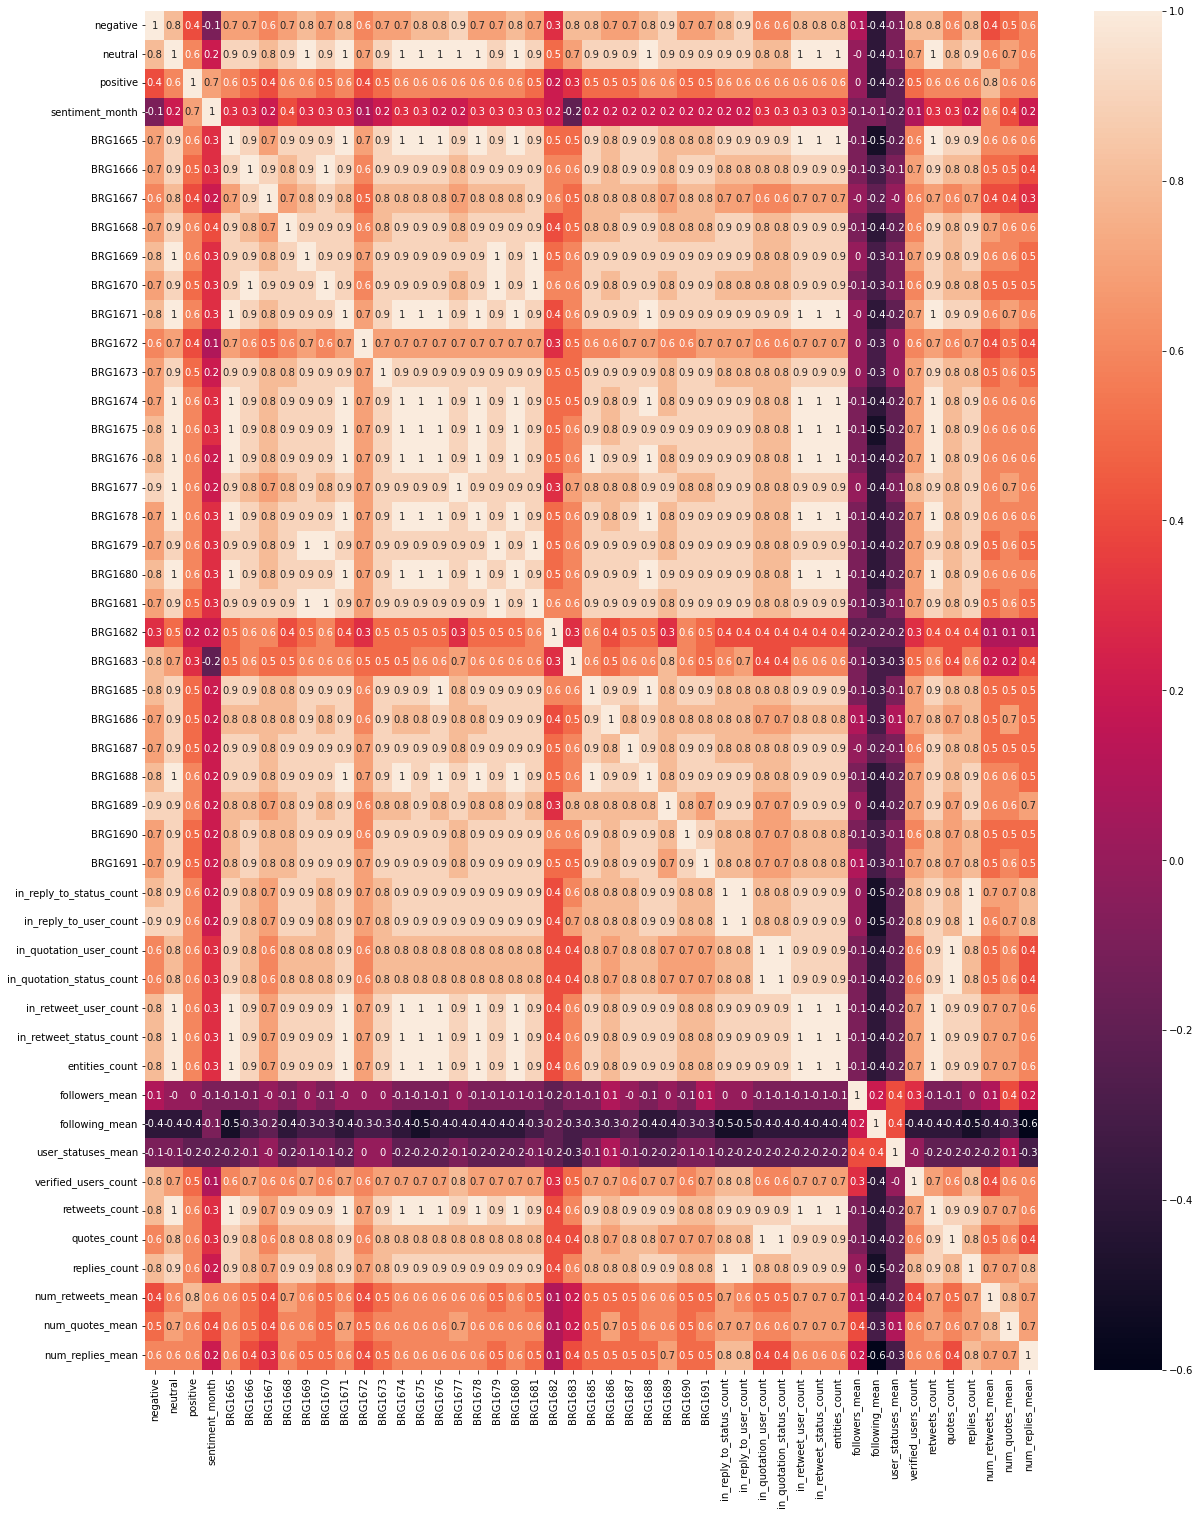

In [4]:
# Heatmap with correlation coefficients between all variables
corr_matrix = df_twitter.corr().round(1)
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize']= 20,25
sns.heatmap(corr_matrix, annot = True)
plt.xticks(rotation = 90)
plt.show()

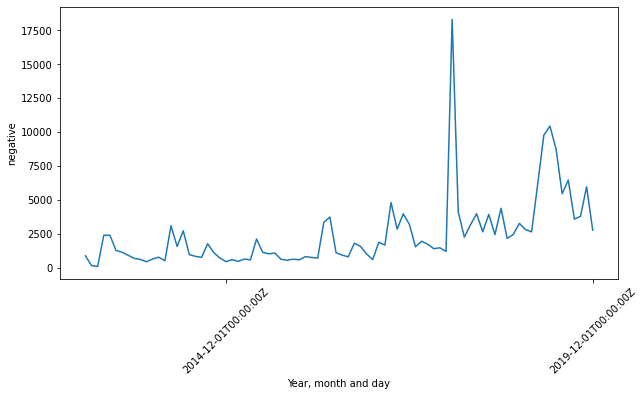

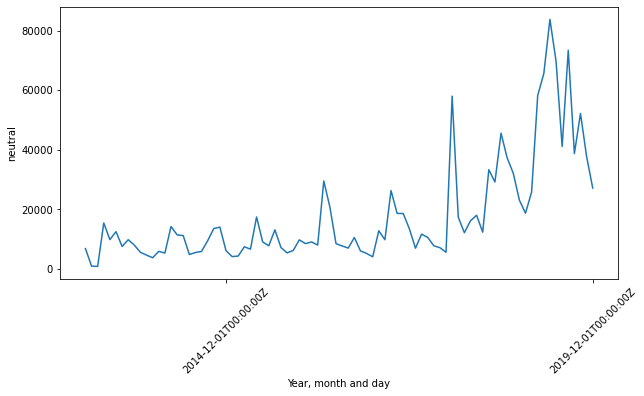

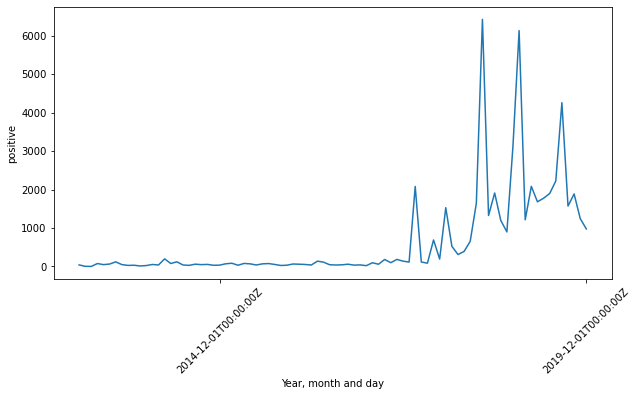

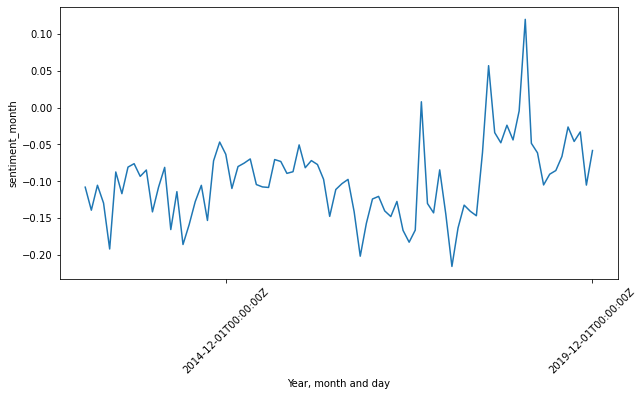

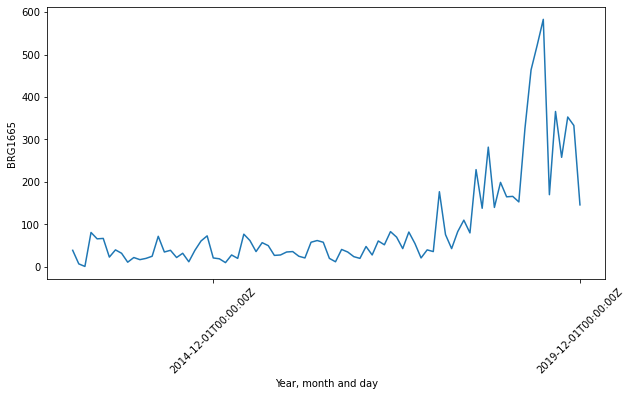

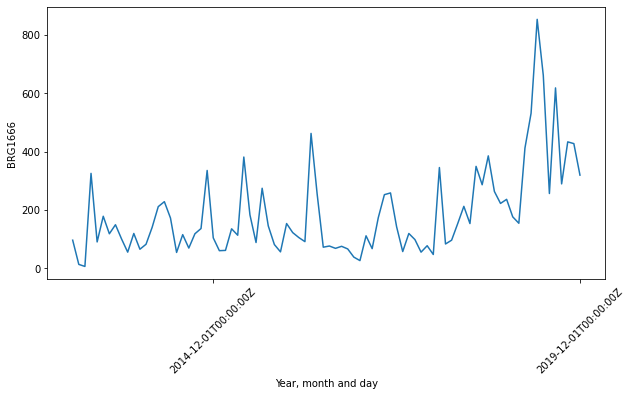

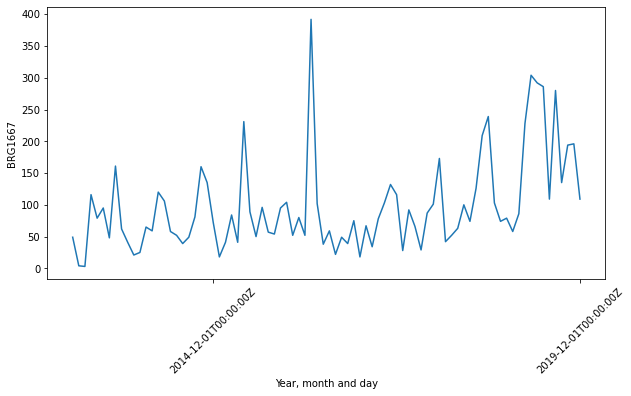

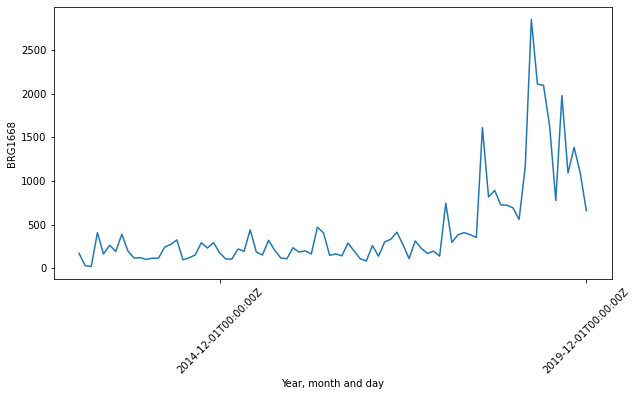

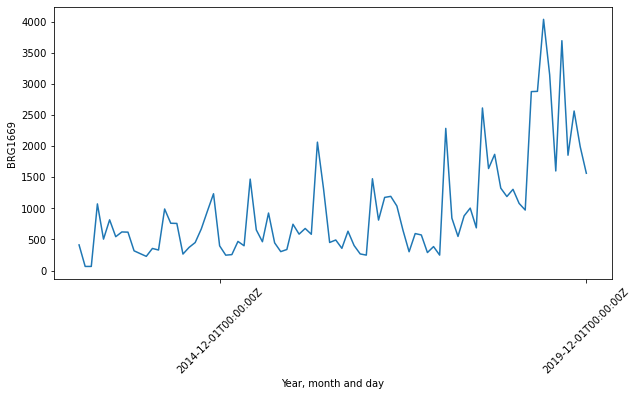

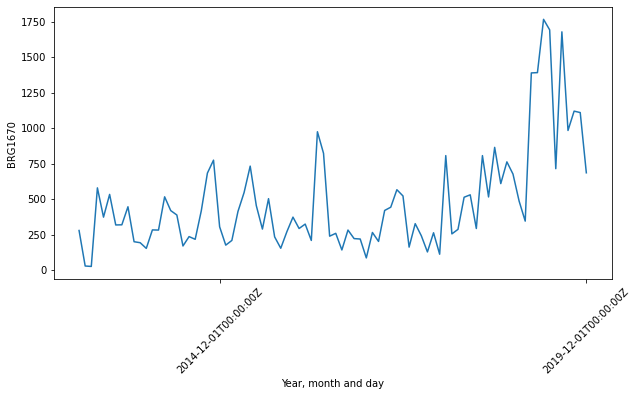

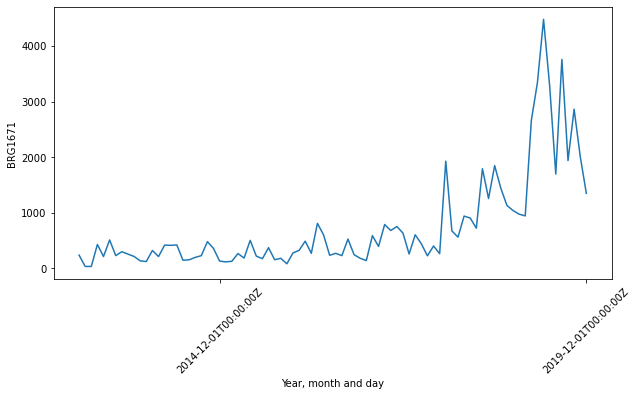

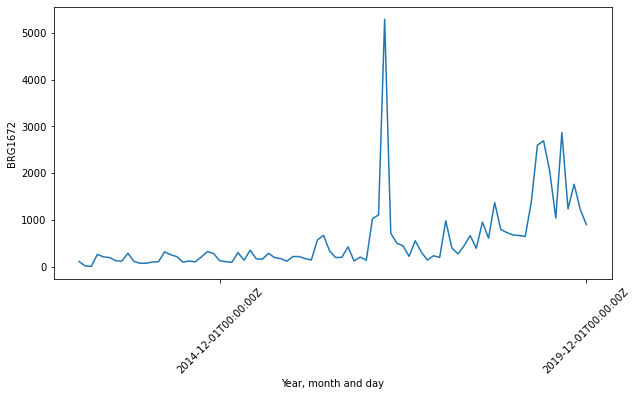

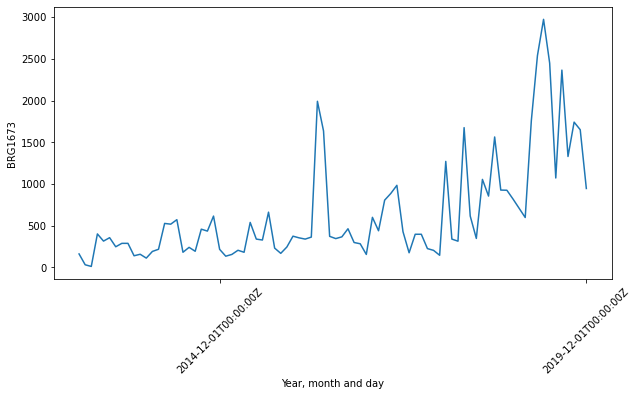

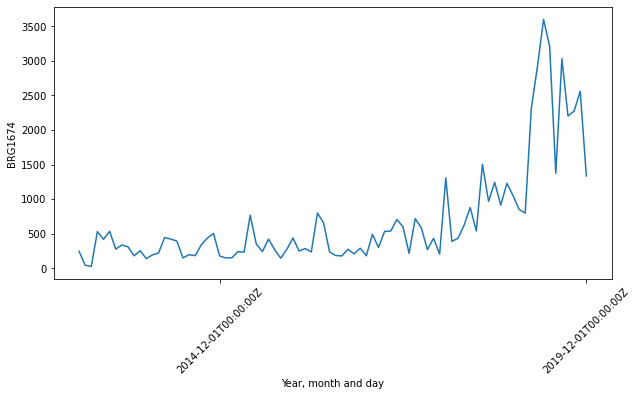

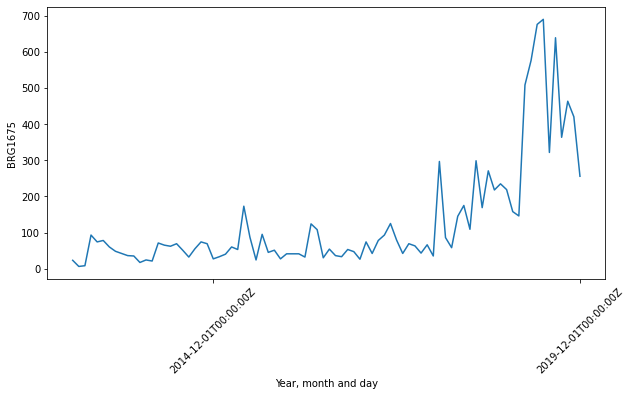

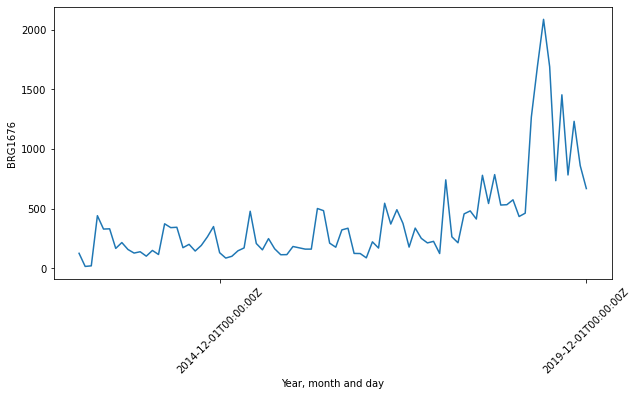

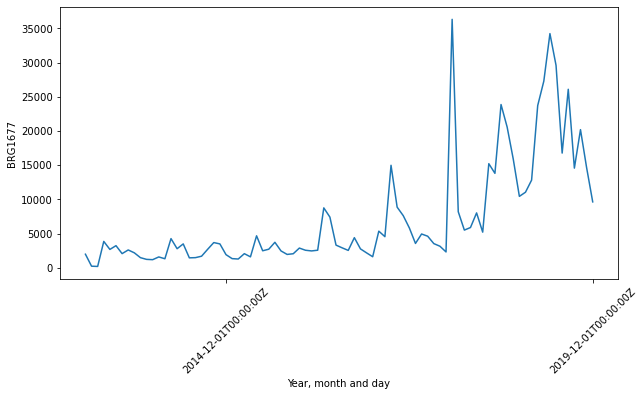

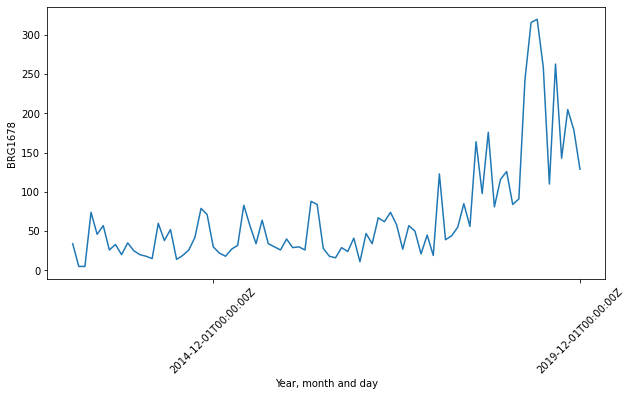

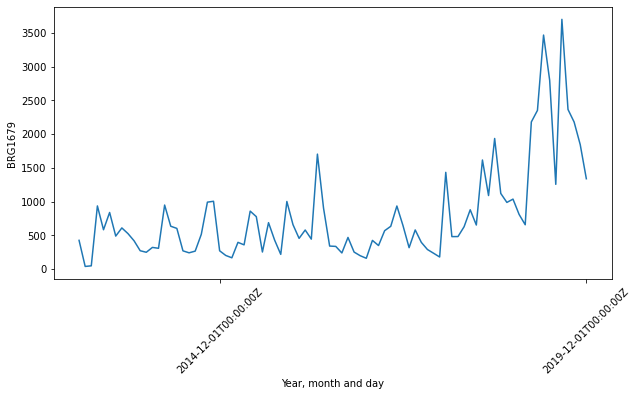

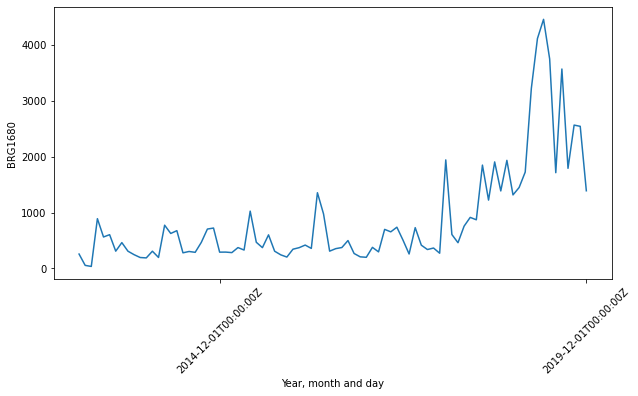

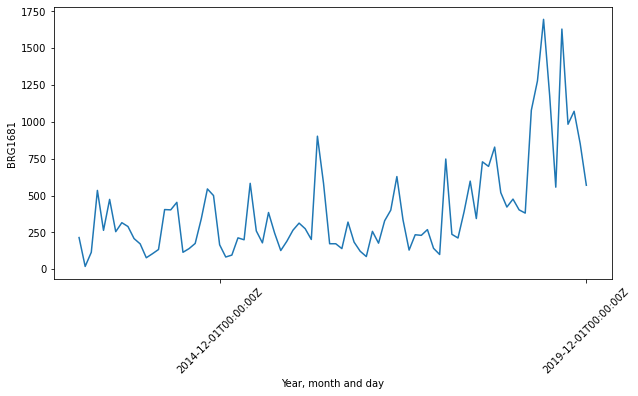

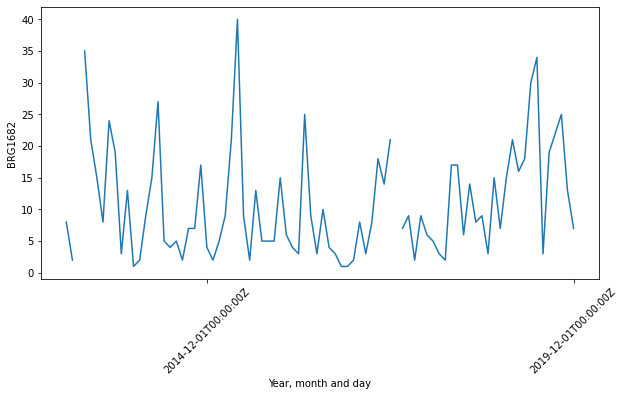

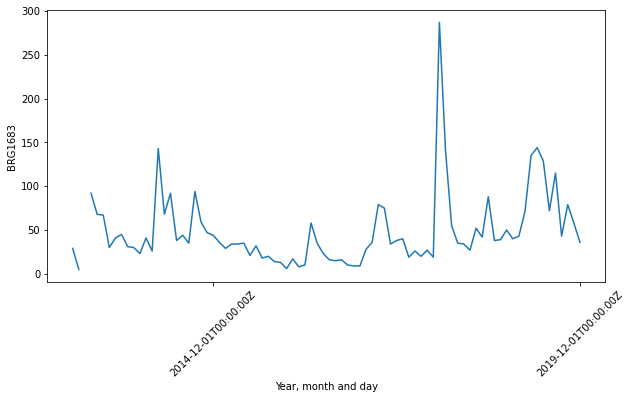

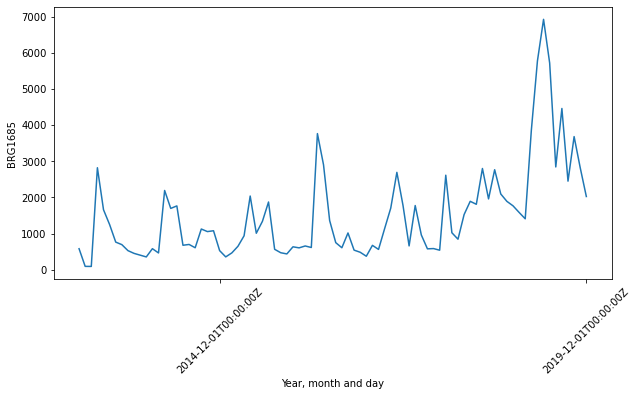

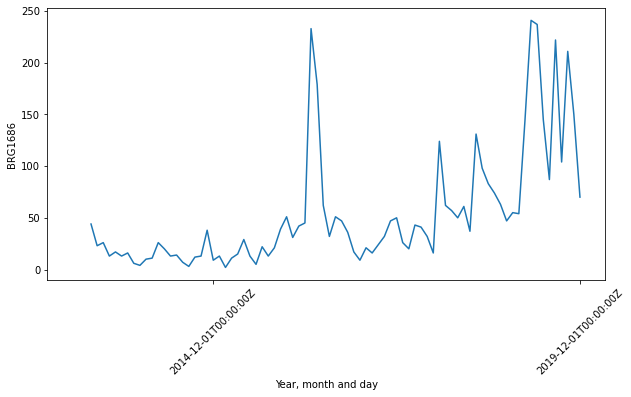

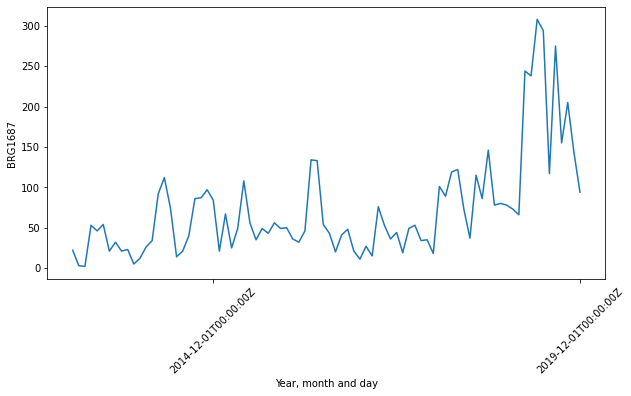

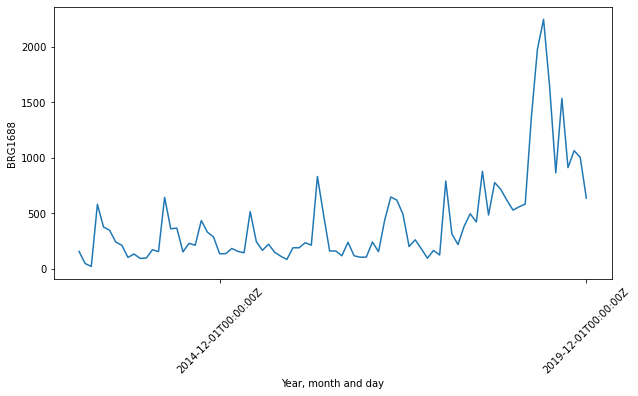

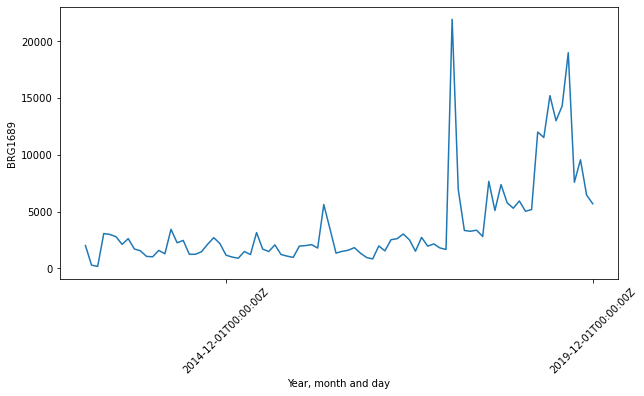

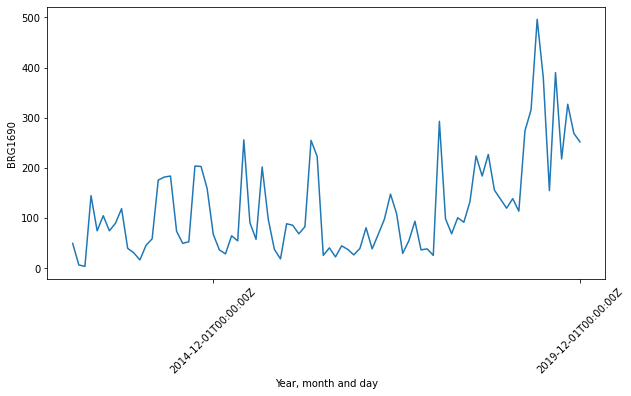

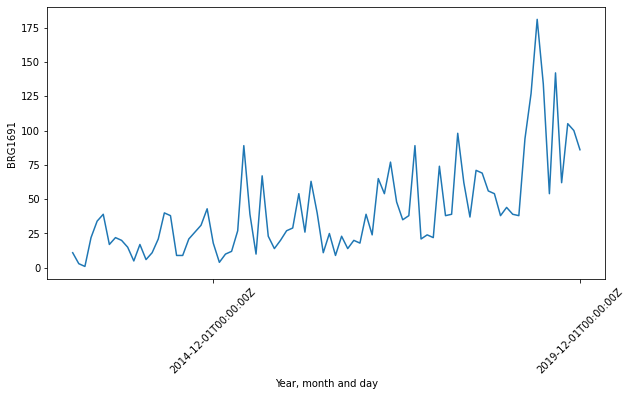

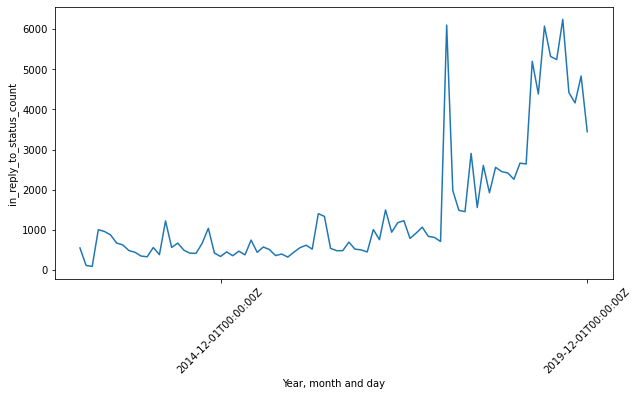

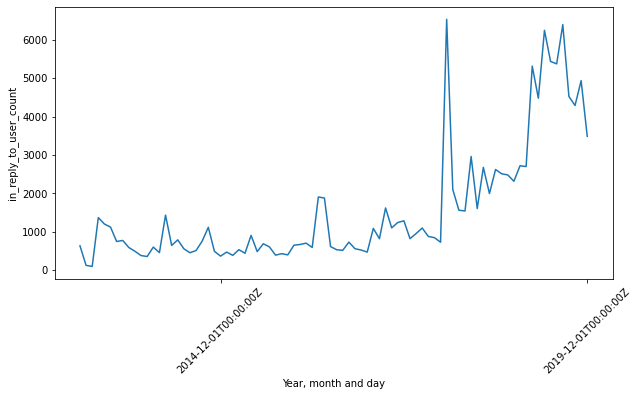

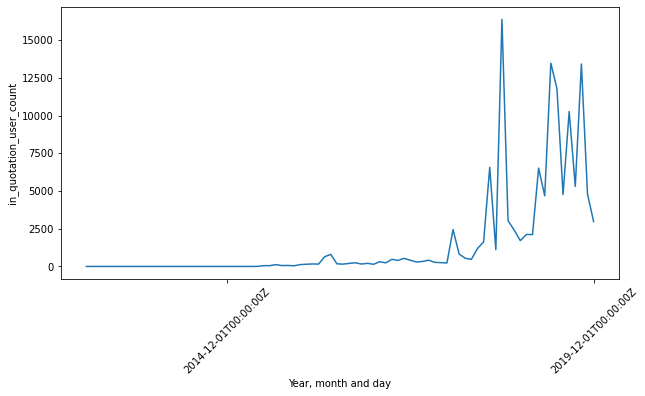

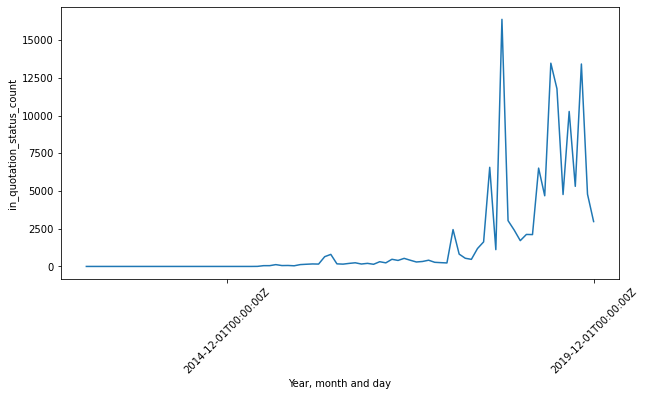

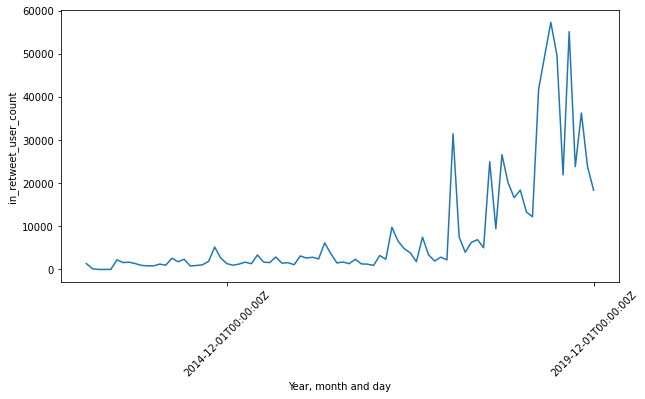

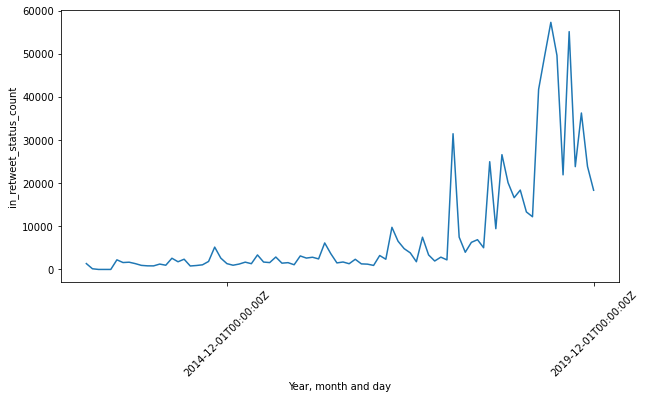

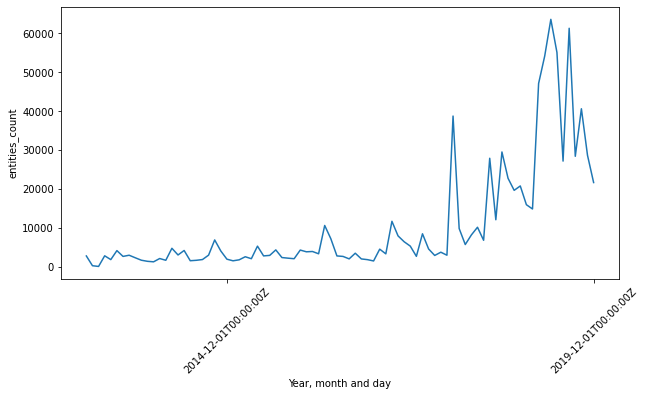

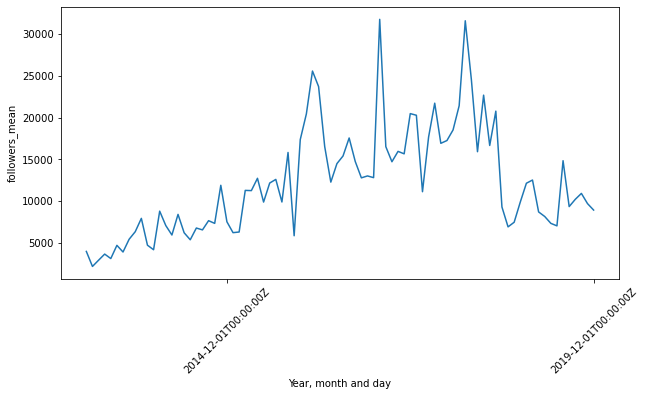

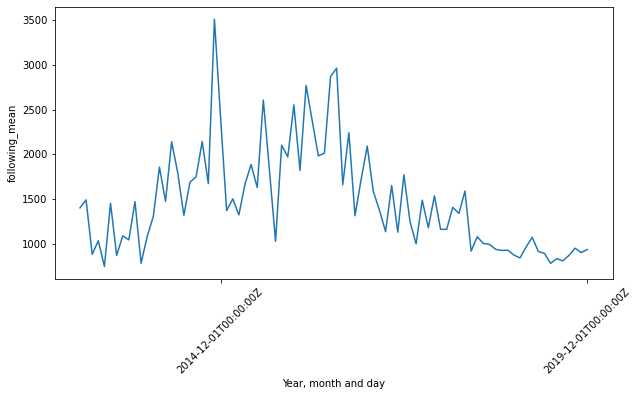

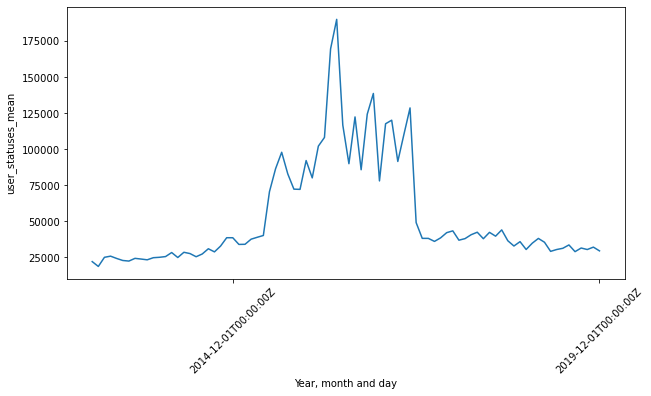

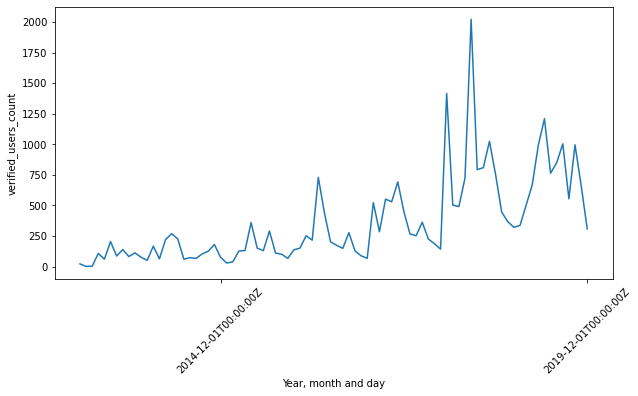

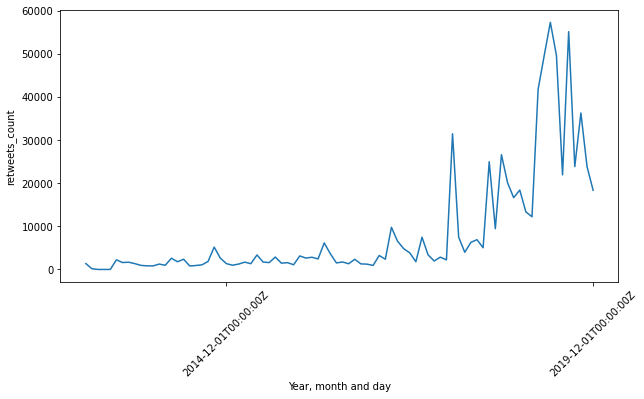

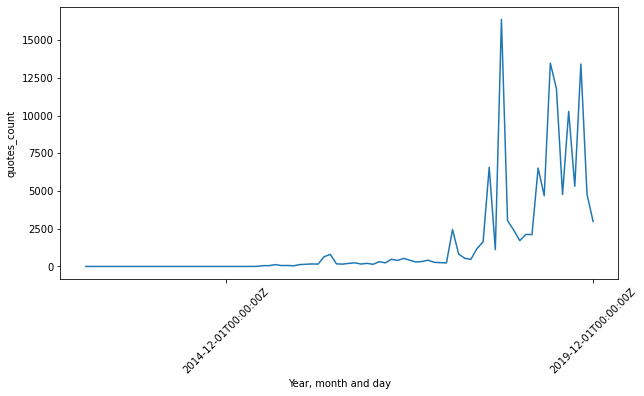

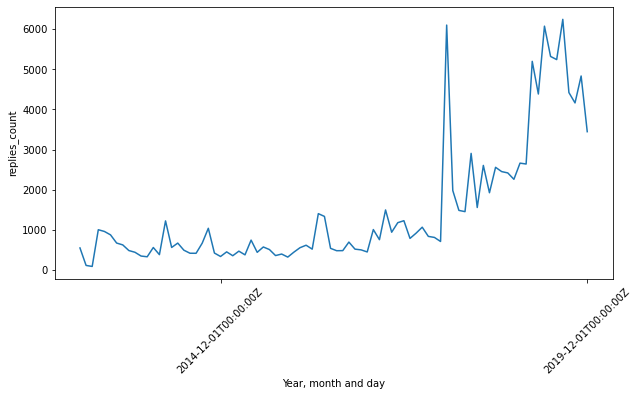

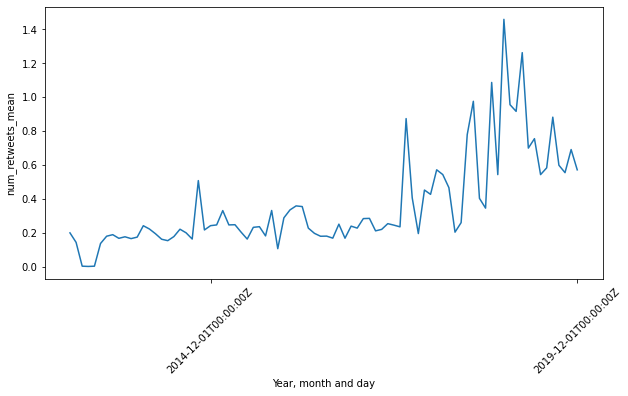

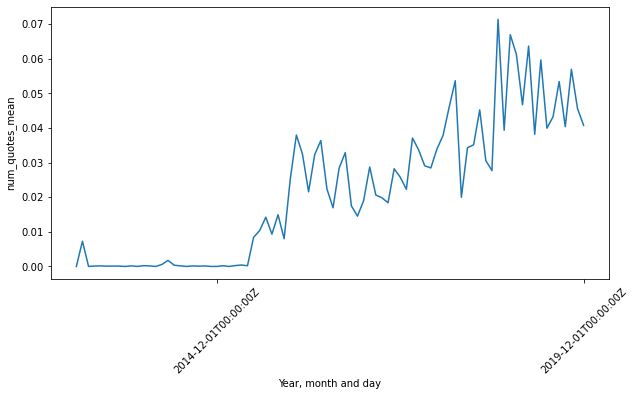

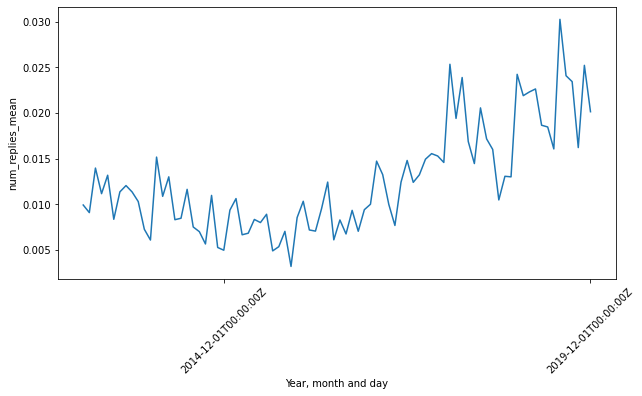

In [5]:
# Line chart of each numerical variable
columns_numeric = df_twitter.select_dtypes(include = [np.number]).columns
plt.rcParams["figure.figsize"]=10,5
for col in columns_numeric:
    plt.plot(df_twitter['year_month'], df_twitter[col])
    plt.xlabel('Year, month and day')
    plt.xticks(rotation = 45)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
    plt.ylabel(col)
    plt.show()

### b) Vaccine uptake

In [63]:
df_dtp = pd.read_csv("../data/uptake_br_dtp_2013_2019_clean.csv",
                    parse_dates = [0])
df_dtp.head()

,Date,BRG1665,BRG1666,BRG1667,BRG1668,BRG1669,BRG1670,BRG1671,BRG1672,BRG1673,BRG1674,BRG1675,BRG1676,BRG1677,BRG1678,BRG1679,BRG1680,BRG1681,BRG1682,BRG1683,BRG1684,BRG1685,BRG1686,BRG1687,BRG1688,BRG1689,BRG1690,BRG1691,Total
0,2013-01-01,2436,8125,2215,11157,26530,19617,6861,8177,13910,17461,5628,6565,40859,19168,8849,25249,18185,7121,30302,6495,18291,5139,1751,13828,88149,4974,3921,420963
1,2013-02-01,2120,7181,1738,12266,29390,16236,5609,6988,11462,17130,7134,5176,37604,20054,8098,21823,20273,7553,25490,6195,17968,4242,2030,12215,95590,4784,3391,409740
2,2013-03-01,2507,7695,1884,14020,32479,17094,5789,6903,11948,17494,7321,5286,39065,20660,8241,20917,20715,7072,27564,6471,17214,3972,1697,11747,76354,5010,3567,400686
3,2013-04-01,3386,9116,2436,15151,35326,22394,7689,9813,15443,22820,7661,7683,46028,23525,8995,25644,21111,7149,29182,7871,21755,5634,1377,16786,97217,5437,4728,481357
4,2013-05-01,2677,7072,1756,10914,32677,18944,6331,7775,12452,19429,8254,5807,39717,23294,8254,21799,23748,6020,29774,6699,16917,6113,1885,12274,87406,5323,3034,426345


In [64]:
df_dtp.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     84 non-null     datetime64[ns]
 1   BRG1665  84 non-null     int64         
 2   BRG1666  84 non-null     int64         
 3   BRG1667  84 non-null     int64         
 4   BRG1668  84 non-null     int64         
 5   BRG1669  84 non-null     int64         
 6   BRG1670  84 non-null     int64         
 7   BRG1671  84 non-null     int64         
 8   BRG1672  84 non-null     int64         
 9   BRG1673  84 non-null     int64         
 10  BRG1674  84 non-null     int64         
 11  BRG1675  84 non-null     int64         
 12  BRG1676  84 non-null     int64         
 13  BRG1677  84 non-null     int64         
 14  BRG1678  84 non-null     int64         
 15  BRG1679  84 non-null     int64         
 16  BRG1680  84 non-null     int64         
 17  BRG1681  84 non-null     int64       

In [65]:
df_dtp_total = df_dtp[['Date', 'Total']]
df_dtp_total.head()

,Date,Total
0,2013-01-01,420963
1,2013-02-01,409740
2,2013-03-01,400686
3,2013-04-01,481357
4,2013-05-01,426345


In [108]:
df_dtp_total.describe()

,Total
count,84.00
mean,377141.52
std,165682.20
min,36317.00
25%,304311.75
50%,349576.50
75%,404348.25
max,1145358.00


# 2. Data split for ML

In [87]:
df = df_twitter.join(df_dtp[['Total']]).replace(np.nan, 0)
df.head()

,negative,neutral,positive,sentiment_month,BRG1665,BRG1666,BRG1667,BRG1668,BRG1669,BRG1670,BRG1671,BRG1672,BRG1673,BRG1674,BRG1675,BRG1676,BRG1677,BRG1678,BRG1679,BRG1680,BRG1681,BRG1682,BRG1683,BRG1685,BRG1686,BRG1687,BRG1688,BRG1689,BRG1690,BRG1691,in_reply_to_status_count,in_reply_to_user_count,in_quotation_user_count,in_quotation_status_count,in_retweet_user_count,in_retweet_status_count,entities_count,followers_mean,following_mean,user_statuses_mean,verified_users_count,retweets_count,quotes_count,replies_count,num_retweets_mean,num_quotes_mean,num_replies_mean,Date,Total
0,878,6834,41,-0.107958,39,97,49,170,412,280,240,116,161,247,23,127,1981,34,427,256,215,8.0,29.0,583,9.0,22,158,2009,50,11,548,633,0,0,1356,1356,2869,3989.661808,1399.480459,22124.984522,22,1356,0,548,0.199665,0.000000,0.009932,2013-01-01 00:00:00+00:00,420963
1,157,938,4,-0.139217,7,14,4,29,66,30,36,21,31,45,6,17,230,5,40,53,19,2.0,5.0,95,0.0,3,49,282,7,3,112,123,0,0,155,155,364,2193.081893,1487.720655,18782.346679,1,155,0,112,0.143767,0.007279,0.009099,2013-02-01 00:00:00+00:00,409740
2,99,830,1,-0.105376,1,7,3,20,66,27,36,11,11,28,8,22,195,5,49,34,115,0.0,0.0,93,0.0,2,23,169,4,1,87,96,0,0,0,0,179,2936.934409,879.112903,25116.846237,3,0,0,87,0.003226,0.000000,0.013978,2013-03-01 00:00:00+00:00,400686
3,2395,15427,76,-0.129568,81,326,116,407,1071,580,431,269,401,532,93,442,3851,74,937,890,535,35.0,92.0,2823,44.0,53,582,3066,145,22,1002,1368,0,0,0,0,2909,3671.593642,1031.220583,25916.370153,108,0,0,1002,0.001676,0.000112,0.011174,2013-04-01 00:00:00+00:00,481357
4,2404,9826,48,-0.191888,66,91,79,162,505,374,215,214,315,420,74,330,2683,46,584,562,264,21.0,68.0,1661,23.0,46,378,2988,75,34,959,1201,0,0,0,0,1933,3136.827578,743.527610,24322.528832,60,0,0,959,0.003176,0.000163,0.013194,2013-05-01 00:00:00+00:00,426345


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   negative                   84 non-null     int64              
 1   neutral                    84 non-null     int64              
 2   positive                   84 non-null     int64              
 3   sentiment_month            84 non-null     float64            
 4   BRG1665                    84 non-null     int64              
 5   BRG1666                    84 non-null     int64              
 6   BRG1667                    84 non-null     int64              
 7   BRG1668                    84 non-null     int64              
 8   BRG1669                    84 non-null     int64              
 9   BRG1670                    84 non-null     int64              
 10  BRG1671                    84 non-null     int64              
 11  BRG1672 

In [251]:
# Get indexes for GridSearchCV
splits = 7
train_prop = 6
valid_prop = 4
test_prop = 2

cv = [([0,1,2,3,4,5],[6,7,8,9]), #10,11
     ([12,13,14,15,16,17],[18,19,20,21]), #22,23
     ([24,25,26,26,27,29],[30,31,32,33]), #34,35
     ([36,37,38,39,40,41],[42,43,44,45]), #46,47
     ([48,49,50,51,52,53],[54,55,56,57]), #58,59
     ([60,61,62,63,64,65],[66,67,68,69]), #70,71
     ([72,73,74,75,76,77],[78,79,80,81]) #82,83
     ]

cv

[([0, 1, 2, 3, 4, 5], [6, 7, 8, 9]),
 ([12, 13, 14, 15, 16, 17], [18, 19, 20, 21]),
 ([24, 25, 26, 26, 27, 29], [30, 31, 32, 33]),
 ([36, 37, 38, 39, 40, 41], [42, 43, 44, 45]),
 ([48, 49, 50, 51, 52, 53], [54, 55, 56, 57]),
 ([60, 61, 62, 63, 64, 65], [66, 67, 68, 69]),
 ([72, 73, 74, 75, 76, 77], [78, 79, 80, 81])]

In [323]:
# Split data
## Get indexes according to previous cv
train_valid_index = [0,1,2,3,4,5,6,7,8,9,12,13,14,15,16,17,
                     18,19,20,21,24,25,26,26,27,29,30,31,32,
                     33,36,37,38,39,40,41,42,43,44,45,48,49,
                     50,51,52,53,54,55,56,57,60,61,62,63,64,
                     65,66,67,68,69,72,73,74,75,76,77,78,79,
                     80,81]
test_index = [10,11,22,23,34,35,46,47,58,59,70,71,82,83]

df_train_valid = []
df_test = []

## Split dataset
df_train_valid = df.drop(['Date'], axis = 1).loc[train_valid_index]
df_test = df.drop(['Date'], axis = 1).loc[test_index]

## Get X and y
X_train_valid = df_train_valid.drop(['Total'], axis = 1)
y_train_valid = df_train_valid['Total']
X_test = df_test.drop(['Total'], axis = 1)
y_test = df_test['Total']

## Print shape of datasets
print('Shape of training-valid X: ', X_train_valid.shape)
print('Shape of test X: ', X_test.shape)
print("")
print('Shape of training-valid Y: ', y_train_valid.shape)      
print('Shape of test Y: ', y_test.shape)

Shape of training-valid X:  (70, 47)
Shape of test X:  (14, 47)

Shape of training-valid Y:  (70,)
Shape of test Y:  (14,)
(70, 48)
(14, 48)


In [324]:
# Export datasets for ML
X_train_valid.to_csv('../data/x_train_valid.csv', index = False)
x_test.to_csv('../data/x_test.csv', index = False)

y_train_valid.to_csv('../data/y_train_valid.csv', index = False)
y_test.to_csv('../data/y_test.csv', index = False)

# 3. Machine learning
## 3.1. K-nearest neighbours

In [254]:
# Create k-NN classifier
knn = KNeighborsClassifier(algorithm = 'brute')

In [300]:
# Parameters
param_grid = dict(n_neighbors = list(range(1,47)),
                 leaf_size = list(range(1,30)),
                 p = [1,2])

In [301]:
# Grid CV
grid = GridSearchCV(knn,
                    param_grid,
                    cv = cv,
                    scoring = 'neg_mean_absolute_error',
                    return_train_score = True,
                    verbose = 1)
grid

GridSearchCV(cv=[([0, 1, 2, 3, 4, 5], [6, 7, 8, 9]),
                 ([12, 13, 14, 15, 16, 17], [18, 19, 20, 21]),
                 ([24, 25, 26, 26, 27, 29], [30, 31, 32, 33]),
                 ([36, 37, 38, 39, 40, 41], [42, 43, 44, 45]),
                 ([48, 49, 50, 51, 52, 53], [54, 55, 56, 57]),
                 ([60, 61, 62, 63, 64, 65], [66, 67, 68, 69]),
                 ([72, 73, 74, 75, 76, 77], [78, 79, 80, 81])],
             estimator=KNeighborsClassifier(algorithm='brute'),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},


In [302]:
# Fit the model
grid_search = grid.fit(df.drop(['Date'], axis = 1), df['Total'])

Fitting 7 folds for each of 2668 candidates, totalling 18676 fits


In [303]:
print("Negative MAE: ", grid_search.best_score_, ", using these parameters: ", grid_search.best_params_)

Negative MAE:  -89008.5 , using these parameters:  {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}


In [290]:
#https://www.kaggle.com/code/grfiv4/displaying-the-results-of-a-grid-search?scriptVersionId=1075161&cellId=3

def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

best parameters: {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
best score:      89008.50000 (+/-58551.89503)
{'algorithm': 'brute',
 'leaf_size': 1,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
645,0.00,0.00,0.00,0.00,8,1,2,"{'leaf_size': 8, 'n_neighbors': 1, 'p': 2}",-59495.75,-9163.75,-205676.00,-126843.25,-99934.25,-63972.25,-57974.25,-89008.50,58551.90,1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
1289,0.00,0.00,0.00,0.00,15,1,2,"{'leaf_size': 15, 'n_neighbors': 1, 'p': 2}",-59495.75,-9163.75,-205676.00,-126843.25,-99934.25,-63972.25,-57974.25,-89008.50,58551.90,1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
2117,0.00,0.00,0.00,0.00,24,1,2,"{'leaf_size': 24, 'n_neighbors': 1, 'p': 2}",-59495.75,-9163.75,-205676.00,-126843.25,-99934.25,-63972.25,-57974.25,-89008.50,58551.90,1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
829,0.00,0.00,0.00,0.00,10,1,2,"{'leaf_size': 10, 'n_neighbors': 1, 'p': 2}",-59495.75,-9163.75,-205676.00,-126843.25,-99934.25,-63972.25,-57974.25,-89008.50,58551.90,1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
461,0.00,0.00,0.00,0.00,6,1,2,"{'leaf_size': 6, 'n_neighbors': 1, 'p': 2}",-59495.75,-9163.75,-205676.00,-126843.25,-99934.25,-63972.25,-57974.25,-89008.50,58551.90,1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
737,0.00,0.00,0.00,0.00,9,1,2,"{'leaf_size': 9, 'n_neighbors': 1, 'p': 2}",-59495.75,-9163.75,-205676.00,-126843.25,-99934.25,-63972.25,-57974.25,-89008.50,58551.90,1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
2393,0.00,0.00,0.00,0.00,27,1,2,"{'leaf_size': 27, 'n_neighbors': 1, 'p': 2}",-59495.75,-9163.75,-205676.00,-126843.25,-99934.25,-63972.25,-57974.25,-89008.50,58551.90,1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
2025,0.00,0.00,0.00,0.00,23,1,2,"{'leaf_size': 23, 'n_neighbors': 1, 'p': 2}",-59495.75,-9163.75,-205676.00,-126843.25,-99934.25,-63972.25,-57974.25,-89008.50,58551.90,1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
2577,0.00,0.00,0.00,0.00,29,1,2,"{'leaf_size': 29, 'n_neighbors': 1, 'p': 2}",-59495.75,-9163.75,-205676.00,-126843.25,-99934.25,-63972.25,-57974.25,-89008.50,58551.90,1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
93,0.00,0.00,0.00,0.00,2,1,2,"{'leaf_size': 2, 'n_neighbors': 1, 'p': 2}",-59495.75,-9163.75,-205676.00,-126843.25,-99934.25,-63972.25,-57974.25,-89008.50,58551.90,1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00


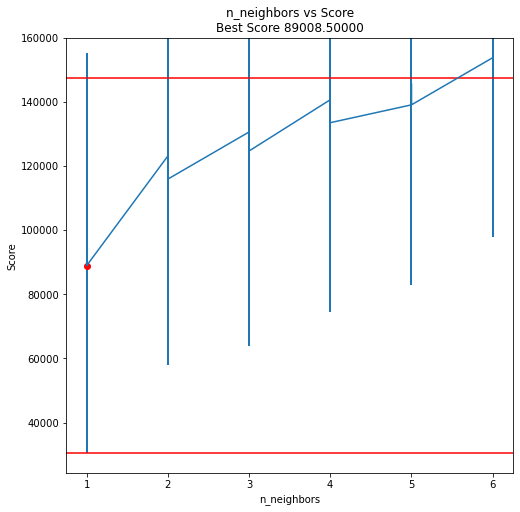

In [304]:
GridSearch_table_plot(grid_search, "n_neighbors")

In [351]:
best_leaf_size = grid_search.best_params_['leaf_size']
best_nn = grid_search.best_params_['n_neighbors']
best_p = grid_search.best_params_['p']

print("Best leaf size: ", best_leaf_size)
print("Best n neighbors: ", best_nn)
print("Best p: ", best_p)

Best leaf size:  1
Best n neighbors:  1
Best p:  2


In [358]:
# Check model with test data and best parameter
knn_best_param = Pipeline([
    ('knn', knn)
])
knn_best_param.set_params(knn__n_neighbors = best_nn,
                         knn__leaf_size = best_leaf_size,
                         knn__p = best_p)
knn_best_param.fit(X_train_valid, y_train_valid)

y_test_pred = np.maximum(knn_best_param.predict(X_test),3)

MAE_knn_test = MAE(y_test, y_test_pred)
MAE_knn_test

98907.21428571429

## 3.2. 